In [15]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score

anex = pd.read_csv(r'D:\UNAD\QUINTO SEMESTRE\ANALISIS DE DATOS\TAREA 3\car details v3.csv') 
anex.head(8129)


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [16]:
anex.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [17]:
print(anex['selling_price'].head())

0    450000
1    370000
2    158000
3    225000
4    130000
Name: selling_price, dtype: int64


In [18]:
carro_mas_costoso = anex['selling_price'].max()

print("El carro más costoso tiene un precio de:", carro_mas_costoso)

El carro más costoso tiene un precio de: 10000000


In [19]:
carro_mas_nuevo = anex['year'].max()

print("El carro más nuevo es:", carro_mas_nuevo)

El carro más nuevo es: 2020


In [20]:
carro_mas_viejo = anex['year'].min()

print("El carro más viejo es:", carro_mas_viejo)

El carro más viejo es: 1983


In [21]:
carro_mas_economico = anex['selling_price'].min()

print("El carro más economico tiene un precio de:", carro_mas_economico)

El carro más economico tiene un precio de: 29999


In [27]:
carro_mas_usado = anex['km_driven'].max()

print("El carro más usado tiene un kilometraje de:", carro_mas_usado)

El carro más usado tiene un kilometraje de: 2360457


In [28]:
carro_menos_usado = anex['km_driven'].min()

print("El carro menos usado tiene un kilometraje de:", carro_menos_usado)

El carro menos usado tiene un kilometraje de: 1


In [22]:
anex['engine_numeric'] = anex['engine'].str.extract('(\d+\.?\d*)').astype(float)

# Encontrar el valor máximo en la columna 'engine_numeric'
carro_motor_mas_grande = anex['engine_numeric'].max()

print("El carro con el motor más grande tiene un motor de", carro_motor_mas_grande, "CC")

El carro con el motor más grande tiene un motor de 3604.0 CC


In [23]:
anex['engine_numeric'] = anex['engine'].str.extract('(\d+\.?\d*)').astype(float)

# Encontrar el valor minimo en la columna 'engine_numeric'
carro_motor_mas_pequeño = anex['engine_numeric'].min()

print("El carro con el motor más pequeño tiene un motor de", carro_motor_mas_pequeño, "CC")

El carro con el motor más pequeño tiene un motor de 624.0 CC


In [24]:
# Extraer solo los números de la columna 'max_power' y convertirlos a float
anex['max_power_numeric'] = anex['max_power'].str.extract('(\d+\.?\d*)').astype(float)

# Establecer límites para los valores mínimos y máximos
min_limite = 50
max_limite = 1900

# Filtrar valores fuera del rango deseado
anex_filtered = anex[(anex['max_power_numeric'] >= min_limite) & (anex['max_power_numeric'] <= max_limite)]

# Encontrar el valor mínimo en la columna 'max_power_numeric' después de filtrar
carro_motor_mas_pequeno = anex_filtered['max_power_numeric'].min()
print("El carro con el motor más pequeño tiene un motor de", carro_motor_mas_pequeno, "bhp")

# Encontrar el valor máximo en la columna 'max_power_numeric' después de filtrar
carro_motor_mas_grande = anex_filtered['max_power_numeric'].max()
print("El carro con el motor más grande tiene un motor de", carro_motor_mas_grande, "bhp")

El carro con el motor más pequeño tiene un motor de 52.0 bhp
El carro con el motor más grande tiene un motor de 400.0 bhp


In [25]:
print(anex['max_power'].head())

0        74 bhp
1    103.52 bhp
2        78 bhp
3        90 bhp
4      88.2 bhp
Name: max_power, dtype: object


In [26]:
print(anex['km_driven'].head())

0    145500
1    120000
2    140000
3    127000
4    120000
Name: km_driven, dtype: int64


In [64]:
print(anex['max_power'].head())

0        74 bhp
1    103.52 bhp
2        78 bhp
3        90 bhp
4      88.2 bhp
Name: max_power, dtype: object


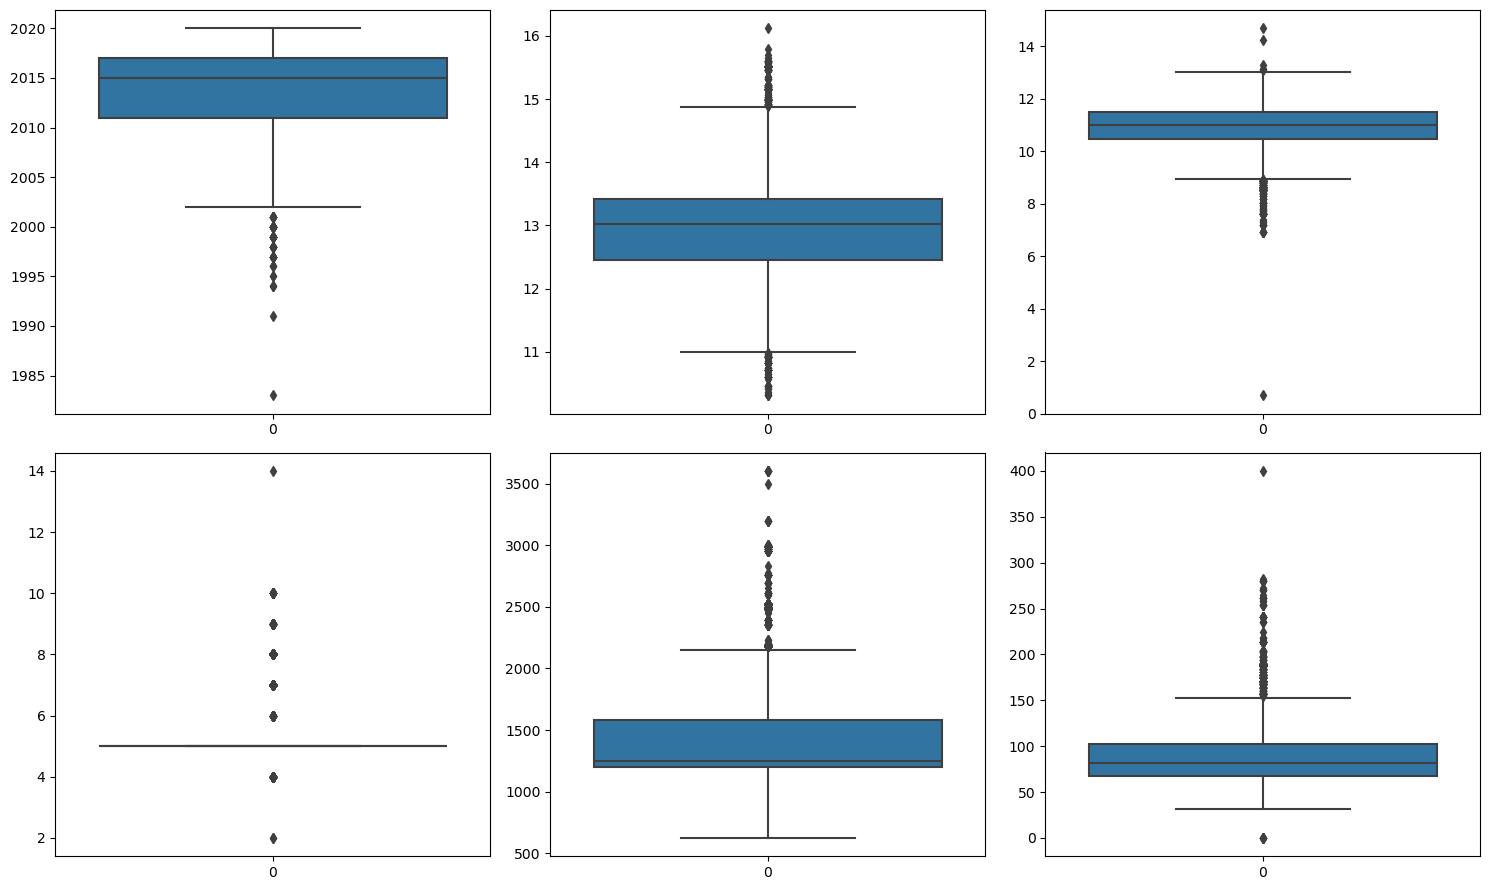

In [65]:
#y_max = 45100 
anex['log_selling_price'] = np.log1p(anex['selling_price']) 
anex['log_km_driven'] = np.log1p(anex['km_driven'])
anex['engine'] = anex['engine'].str.extract('(\d+)').astype(float) 
anex['max_power'] = anex['max_power'].str.extract('(\d+)').astype(float)
fig, axs = plt.subplots(2,3, figsize = (15,9))
plt1 = sns.boxplot(anex['year'], ax = axs[0,0])
plt2 = sns.boxplot(anex['log_selling_price'], ax = axs[0,1])
plt3 = sns.boxplot(anex['log_km_driven'], ax = axs[0,2])
plt1 = sns.boxplot(anex['seats'], ax = axs[1,0])
plt2 = sns.boxplot(anex['engine'], ax = axs[1,1]) 
plt3 = sns.boxplot(anex['max_power'], ax = axs[1,2]) 
#y_min = anex['selling_price'].min(0)
#y_max = anex['selling_price'].max(451000)
#axs[0, 1].set_ylim(0, y_max)
plt.tight_layout()

In [66]:
print("cantidad de datos con cero registros en year: ",anex['year'].isin([0]).sum())  
print("cantidad de datos con cero registros en selling_price: ",anex['selling_price'].isin([0]).sum())
print("cantidad de datos con cero registros en km_driven: ",anex['km_driven'].isin([0]).sum())
print("cantidad de datos con cero registros en mileage: ",anex['mileage'].isin([0]).sum())
print("cantidad de datos con cero registros en engine: ",anex['engine'].isin([0]).sum())
print("cantidad de datos con cero registros en max_power: ",anex['max_power'].isin([0]).sum()) 
print("cantidad de datos con cero registros en seats: ",anex['seats'].isin([0]).sum()) 
print("cantidad de datos con cero registros en torque: ",anex['torque'].isin([0]).sum())


cantidad de datos con cero registros en year:  0
cantidad de datos con cero registros en selling_price:  0
cantidad de datos con cero registros en km_driven:  0
cantidad de datos con cero registros en mileage:  0
cantidad de datos con cero registros en engine:  0
cantidad de datos con cero registros en max_power:  6
cantidad de datos con cero registros en seats:  0
cantidad de datos con cero registros en torque:  0


In [67]:
anex['max_power']=anex['max_power'].replace(0,anex['max_power'].mean())

In [68]:
print("cantidad de datos con cero registros en max_power: ",anex['max_power'].isin([0]).sum())

cantidad de datos con cero registros en max_power:  0


In [69]:
min=1990
max=2020 
atipico=((anex['year']<min)|(anex['year']>max)).sum()
print("el total de datos atipicos es {}".format(atipico)) 


el total de datos atipicos es 1


In [117]:
anex['max_power_numeric'] = anex['max_power'].str.extract('(\d+\.?\d*)').astype(float)

# Encontrar el valor minimo en la columna 'engine_numeric'
carro_motor_mas_pequeño = anex['max_power_numeric'].min()

print("El carro con el motor más pequeño tiene un motor de", carro_motor_mas_pequeño, "CC")

El carro con el motor más pequeño tiene un motor de 0.0 CC


In [70]:
min=1000
max=300000
atipico1=((anex['km_driven']<min)|(anex['km_driven']>max)).sum()
print("el total de datos atipicos es {}".format(atipico1)) 


el total de datos atipicos es 19


In [71]:
min=4
max=10
atipico2=((anex['seats']<min)|(anex['seats']>max)).sum()
print("el total de datos atipicos es {}".format(atipico2))


el total de datos atipicos es 3


In [72]:
min=50
max=1900
atipico3=((anex['engine']<max)|(anex['engine']>min)).sum()
print("el total de datos atipicos es {}".format(atipico3))


el total de datos atipicos es 7907


In [73]:
anex=anex[(anex['engine']<max)&(anex['engine']>min)] 

In [74]:
atipico3=((anex['engine']<min)|(anex['engine']>max)).sum()
print("el total de datos atipicos es {}".format(atipico3))

el total de datos atipicos es 0


In [75]:
anex.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6287 entries, 0 to 8127
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               6287 non-null   object 
 1   year               6287 non-null   int64  
 2   selling_price      6287 non-null   int64  
 3   km_driven          6287 non-null   int64  
 4   fuel               6287 non-null   object 
 5   seller_type        6287 non-null   object 
 6   transmission       6287 non-null   object 
 7   owner              6287 non-null   object 
 8   mileage            6287 non-null   object 
 9   engine             6287 non-null   float64
 10  max_power          6286 non-null   float64
 11  torque             6286 non-null   object 
 12  seats              6287 non-null   float64
 13  log_selling_price  6287 non-null   float64
 14  log_km_driven      6287 non-null   float64
dtypes: float64(5), int64(3), object(7)
memory usage: 785.9+ KB


In [76]:
anex['selling_price'].value_counts()

selling_price
300000    192
350000    189
600000    174
550000    168
650000    165
         ... 
911999      1
449000      1
698000      1
539000      1
746000      1
Name: count, Length: 541, dtype: int64

In [77]:
anex[['selling_price']].head(50)

,selling_price
0,450000
1,370000
2,158000
3,225000
4,130000
5,440000
6,96000
7,45000
8,350000
9,200000


In [78]:
#T = anex.drop('selling_price',axis=1)
#TE = anex['selling_price'] 
#T_train, T_test, TE_train, TE_test = train_test_split(T, TE, test_size=0.25, stratify=TE, random_state= 0) 
#print (T_train) 
anex = anex[['selling_price', 'km_driven', 'seats', 'year', 'engine']]
t = anex.drop('selling_price',axis=1)
te = anex['selling_price']
t_train, t_test, te_train, te_test = train_test_split(t, te, test_size=0.25, random_state= 0)  

In [79]:
modelo_regresion = LinearRegression() 
modelo_regresion.fit (t_train , te_train)   
Prediccion = modelo_regresion.predict(t_test) 
#print(Prediccion)
print (t_train)


      km_driven  seats  year  engine
1205      30000    5.0  2015  1197.0
5707      15000    4.0  2015   624.0
6037      40000    7.0  2017  1493.0
6411      74000    5.0  2012  1199.0
1126      25538    5.0  2017  1496.0
...         ...    ...   ...     ...
6390     120000    5.0  2013  1197.0
4245      25538    5.0  2017  1496.0
2187      40000    5.0  2012  1497.0
3389     120000    5.0  2012  1248.0
3559      19000    5.0  2019  1197.0

[4715 rows x 4 columns]


In [80]:
print (te_train)


1205    511000
5707    110000
6037    700000
6411    350000
1126    625000
         ...  
6390    370000
4245    625000
2187    560000
3389    287000
3559    570000
Name: selling_price, Length: 4715, dtype: int64


In [81]:
#rl = LinearRegression(solver = "liblinear") 
#rl.fit (t_train , te_train) 
#Prediccion = rl.predict(t_test)  
# Crear una instancia del modelo de regresión lineal
rl = LinearRegression()
# Ajustar el modelo a los datos de entrenamiento
rl.fit(t_train, te_train)
# Hacer predicciones utilizando el modelo entrenado
Prediccion = rl.predict(t_test)

In [82]:
print (te_test)

7505    700000
717     385000
5919    380000
3347    455000
4357    625000
         ...  
5599    550000
7046    420000
5113    200000
3297    600000
4946    376000
Name: selling_price, Length: 1572, dtype: int64


In [83]:
print (Prediccion)

[624490.13328812 567727.763639   388030.03138764 ... 213419.43370914
 535006.61777155 360383.19890907]


In [84]:
mse = mean_squared_error(te_test, Prediccion)
print("Error cuadrático medio:", mse)

Error cuadrático medio: 23992045858.359833


In [85]:
r2 = r2_score(te_test, Prediccion)
print("Coeficiente de determinación (R-cuadrado):", r2)

Coeficiente de determinación (R-cuadrado): 0.633405840968877


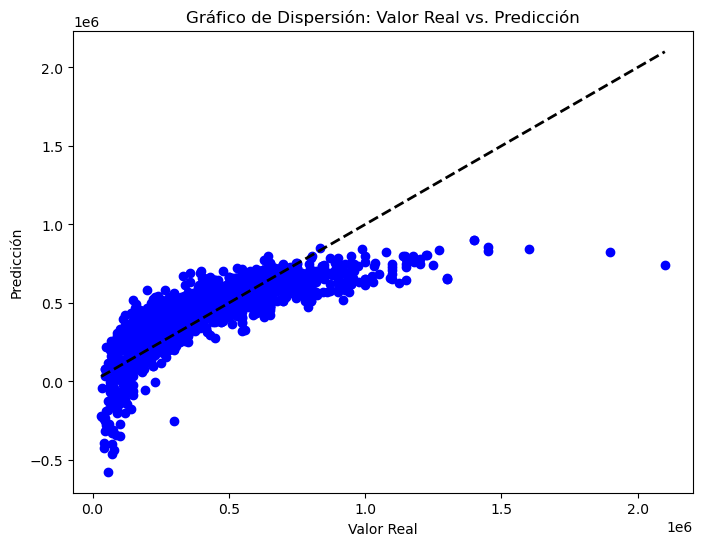

In [86]:
plt.figure(figsize=(8, 6))
plt.scatter(te_test, Prediccion, color='blue')
plt.plot([te_test.min(), te_test.max()], [te_test.min(), te_test.max()], 'k--', lw=2)  # Línea diagonal para referencia
plt.xlabel('Valor Real')
plt.ylabel('Predicción')
plt.title('Gráfico de Dispersión: Valor Real vs. Predicción')
plt.show()

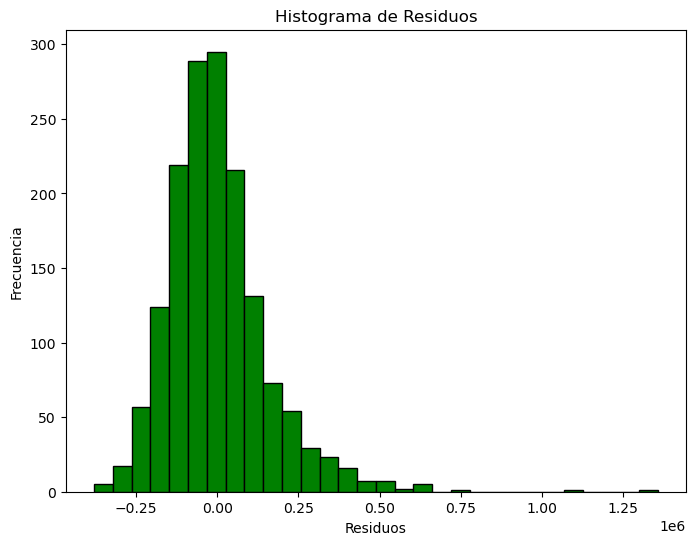

In [87]:
residuos = te_test - Prediccion
# Crear un histograma de los residuos
plt.figure(figsize=(8, 6))
plt.hist(residuos, bins=30, color='green', edgecolor='black')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Histograma de Residuos')
plt.show()